In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


In [2]:

np.random.seed(42)
random.seed(42)

domains = ['Data Science', 'Web Development', 'Cybersecurity', 'AI/ML', 'IoT', 'Cloud Computing']
branches = ['CSE', 'ECE', 'EEE', 'Mechanical', 'Civil']
statuses = ['Applied', 'Selected', 'Rejected']

n = 300

data = {
    'Student ID': [f"MITS{1000+i}" for i in range(n)],
    'Name': [f"Student_{i}" for i in range(n)],
    'Year': np.random.choice([2, 3, 4], size=n),
    'Branch': np.random.choice(branches, size=n),
    'Internship Domain': np.random.choice(domains, size=n, p=[0.3, 0.25, 0.15, 0.1, 0.1, 0.1]),
    'Applied Date': pd.to_datetime(np.random.choice(pd.date_range("2025-01-01", "2025-06-30"), size=n)),
    'Status': np.random.choice(statuses, size=n, p=[0.6, 0.3, 0.1])
}

df = pd.DataFrame(data)
df.head()


,Student ID,Name,Year,Branch,Internship Domain,Applied Date,Status
0,MITS1000,Student_0,4,EEE,Cloud Computing,2025-02-22,Applied
1,MITS1001,Student_1,2,Civil,Cloud Computing,2025-04-14,Applied
2,MITS1002,Student_2,4,CSE,AI/ML,2025-04-14,Applied
3,MITS1003,Student_3,4,Mechanical,Web Development,2025-06-28,Applied
4,MITS1004,Student_4,2,CSE,Data Science,2025-02-08,Applied


<Figure size 1000x600 with 0 Axes>

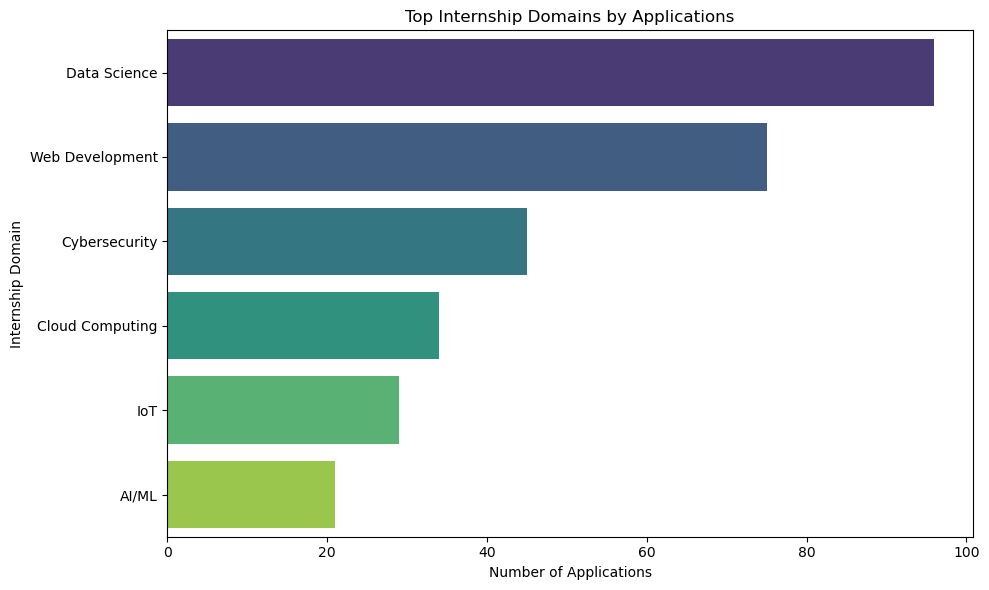

In [7]:

plt.figure(figsize=(10,6))
popular_df = popular_domains.reset_index()
popular_df.columns = ['Domain', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=popular_df, x='Count', y='Domain', hue='Domain', palette='viridis', dodge=False, legend=False)
plt.title("Top Internship Domains by Applications")
plt.xlabel("Number of Applications")
plt.ylabel("Internship Domain")
plt.tight_layout()
plt.show()


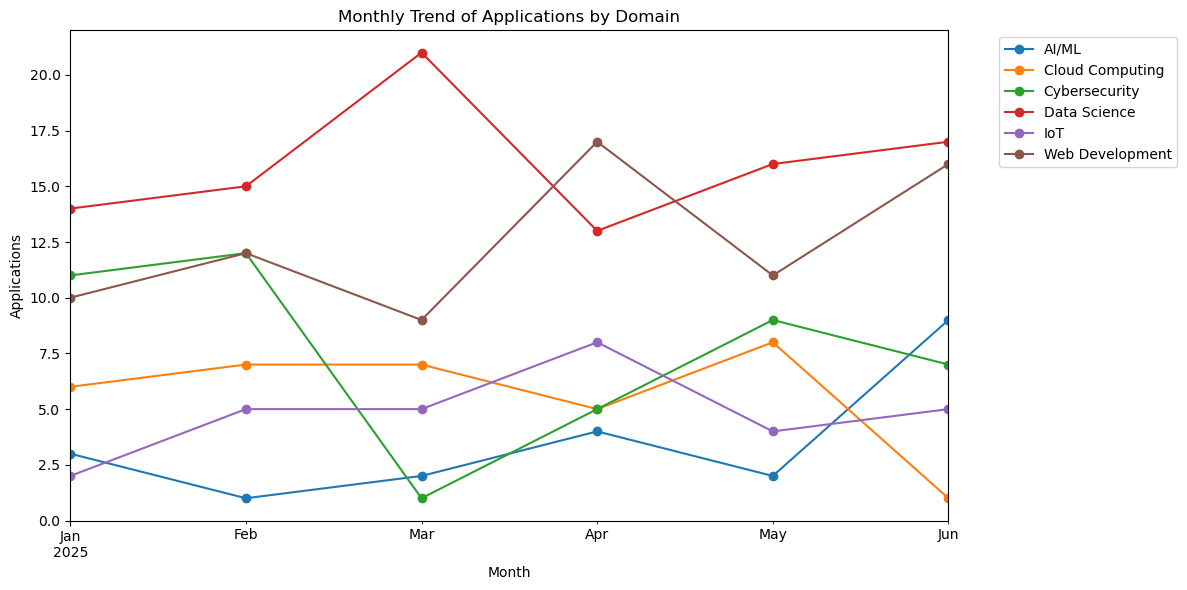

In [4]:

df['Month'] = df['Applied Date'].dt.to_period('M')
monthly_trends = df.groupby(['Month', 'Internship Domain']).size().unstack().fillna(0)
monthly_trends.plot(figsize=(12,6), marker='o')
plt.title("Monthly Trend of Applications by Domain")
plt.xlabel("Month")
plt.ylabel("Applications")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


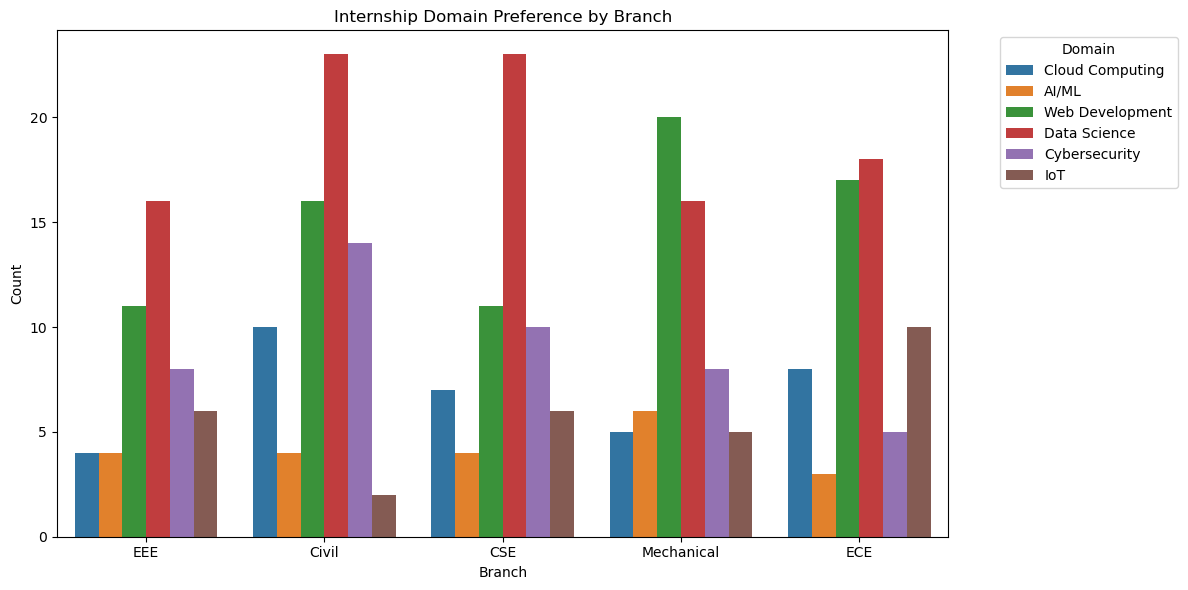

In [5]:

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Branch', hue='Internship Domain')
plt.title("Internship Domain Preference by Branch")
plt.xlabel("Branch")
plt.ylabel("Count")
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


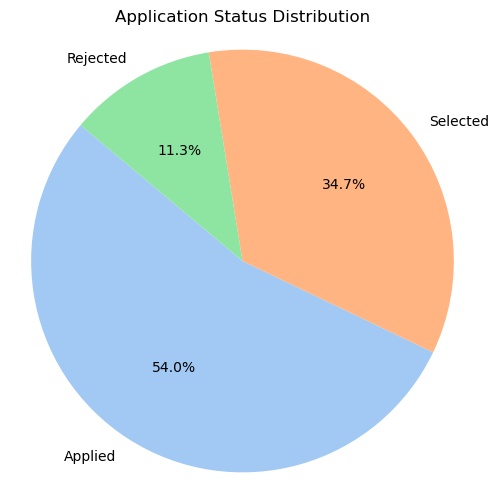

In [6]:

status_counts = df['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Application Status Distribution")
plt.axis('equal')
plt.show()
